In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress

In [2]:
dis_yfinance = pd.read_csv("data/disney_yfinance.csv")
dis_submissions = pd.read_csv("data/disney_all_sub.csv")
disland_submissions = pd.read_csv("data/disneyland_all_subs.csv")
displus_submissions = pd.read_csv("data/disneyplus_all_subs.csv")
pixar_submissions = pd.read_csv("data/pixar_all_subs.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,5,6,8,9,10,11,12,16,18,19,20,21,22,24,25,26,27,28,29,30,31,35,37,39,43,44,49,53,56,58,59,60,65,66,67,68,69,74,75,76,77,78,79,80,81,83,85,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,6,8,9,10,11,12,16,18,19,20,21,22,23,25,26,28,29,31,32,33,34,35,39,41,43,47,48,49,53,57,60,61,63,64,67,68,69,70,71,76,77,79,80,81,82,83,84,87,89,90,91,92,93,94,95,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,9,41,55,66,72,78,80,81,82,83,84,85,88,92,94,95,96) have mixed types.Specify dtype option on import or set low_memory=Fals

In [3]:
sub_list = [disland_submissions, displus_submissions, pixar_submissions]

In [4]:
dis_yfinance.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,28.855125,29.533344,28.361876,29.471687,23.115255,8402230
1,1/4/2000,29.594999,31.444689,29.594999,31.198063,24.469284,16051191
2,1/5/2000,31.198063,32.677814,31.198063,32.492844,25.484806,19823822
3,1/6/2000,32.492844,32.677814,31.198063,31.198063,24.469284,7903193
4,1/7/2000,31.198063,31.691313,30.396530,30.704813,24.082420,6773543


In [5]:
dis_submissions.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,brand_safe,rte_mode,author_id,previous_visits,suggested_sort,author_created_utc,approved_at_utc,banned_at_utc,view_count,creation_date
0,[],False,The-Remix-God-ALT,0,[],0,text,t2_8b0yo2pg,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
1,[],False,Supershlee777,0,[],0,text,t2_7zle95u7,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
2,[],False,theagileartist,0,[],0,text,t2_7ohoma2p,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
3,[],False,PeachyLeee,0,[],0,text,t2_684v8y3b,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
4,[],False,artsychimichanga,0,[],0,text,t2_50qxngv9,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021


In [6]:
dis_submissions['created_utc']

0        1610296640
1        1610295828
2        1610294416
3        1610293394
4        1610292454
            ...    
80255    1417798928
80256    1417798765
80257    1417795991
80258    1417790770
80259    1417789646
Name: created_utc, Length: 80260, dtype: int64

## Function to append a readable creation date column to subreddit df

In [7]:
def create_date_reddit(reddit_df):
    sub_dates = []

    for _ in reddit_df['created_utc']:
        fts = datetime.utcfromtimestamp(_).strftime('%m-%d-%Y')
        sub_dates.append(fts)

    # Appends new column to dataframe, contains readable string date-times
    reddit_df['creation_date'] = sub_dates
    
    return(1)

In [8]:
create_date_reddit(dis_submissions)

1

In [9]:
for _ in sub_list:
    create_date_reddit(_)

In [10]:
# create_date_reddit(disland_submissions)
# create_date_reddit(displus_submissions)
# create_date_reddit(pixar_submissions)

In [11]:
dis_submissions['creation_date']

0        01-10-2021
1        01-10-2021
2        01-10-2021
3        01-10-2021
4        01-10-2021
            ...    
80255    12-05-2014
80256    12-05-2014
80257    12-05-2014
80258    12-05-2014
80259    12-05-2014
Name: creation_date, Length: 80260, dtype: object

## Function to Created parsed dates columns for yfinance dfs

In [12]:
def yfi_parsed_dates(df):
    parsed_dates = []

    for _ in df['Date']:
        if '-' in _:
            y_datetime_object = datetime.strptime(_, '%Y-%m-%d')
            
        elif '/' in _:
            y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
    
        parsed_dates.append(y_datetime_object)
    
    df['parsed_dates'] = parsed_dates

In [13]:
yfi_parsed_dates(dis_yfinance)

In [14]:
disland_yfinance = dis_yfinance.copy()
displus_yfinance = dis_yfinance.copy()
dispix_yfinance = dis_yfinance.copy()

In [15]:
dis_yfinance.head()

,Date,Open,High,Low,Close,Adj Close,Volume,parsed_dates
0,1/3/2000,28.855125,29.533344,28.361876,29.471687,23.115255,8402230,2000-01-03
1,1/4/2000,29.594999,31.444689,29.594999,31.198063,24.469284,16051191,2000-01-04
2,1/5/2000,31.198063,32.677814,31.198063,32.492844,25.484806,19823822,2000-01-05
3,1/6/2000,32.492844,32.677814,31.198063,31.198063,24.469284,7903193,2000-01-06
4,1/7/2000,31.198063,31.691313,30.396530,30.704813,24.082420,6773543,2000-01-07


## Function to Created parsed dates columns for subreddit dfs

In [16]:
def red_parsed_dates(df):
    parsed_dates = []
    for _ in df['creation_date']:
        red_datetime_object = datetime.strptime(_, '%m-%d-%Y')
        parsed_dates.append(red_datetime_object)
    df['parsed_dates'] = parsed_dates
    
    return(1)

In [17]:
red_parsed_dates(dis_submissions)

1

In [18]:
for _ in sub_list:
    red_parsed_dates(_)

In [19]:
# red_parsed_dates(disland_submissions)
# red_parsed_dates(displus_submissions)
# red_parsed_dates(pixar_submissions)

## Function to match date ranges of yfinance and reddit submissions

In [20]:
dis_submissions['parsed_dates'].sort_values()

80259   2014-12-05
80258   2014-12-05
80248   2014-12-05
80250   2014-12-05
80251   2014-12-05
           ...    
904     2021-12-04
903     2021-12-04
902     2021-12-04
901     2021-12-04
900     2021-12-04
Name: parsed_dates, Length: 80260, dtype: datetime64[ns]

In [21]:
dis_yfinance['parsed_dates']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5488   2021-10-25
5489   2021-10-26
5490   2021-10-27
5491   2021-10-28
5492   2021-10-29
Name: parsed_dates, Length: 5493, dtype: datetime64[ns]

In [22]:
def match_date_range(yfinance_df, reddit_df):

    reddit_begin = reddit_df['parsed_dates'].iloc[-1]
    reddit_end = reddit_df['parsed_dates'].sort_values().iloc[0]
    yahoo_end = yfinance_df['parsed_dates'].iloc[-1]
    
    reddit_df = reddit_df[(reddit_df['parsed_dates'] <= yahoo_end)]
    # yfinance_df = yfinance_df[(yfinance_df['parsed_dates'] <= reddit_end)]
    yfinance_df = yfinance_df[(yfinance_df['parsed_dates'] >= reddit_begin)]

    
    return(yfinance_df, reddit_df)

In [23]:
dis_yfinance = match_date_range(dis_yfinance, dis_submissions)[0]
dis_submissions = match_date_range(dis_yfinance, dis_submissions)[1]

In [24]:
disland_yfinance = match_date_range(disland_yfinance, disland_submissions)[0]
disland_submissions = match_date_range(disland_yfinance, disland_submissions)[1]

displus_yfinance = match_date_range(displus_yfinance, displus_submissions)[0]
displus_submissions = match_date_range(displus_yfinance, displus_submissions)[1]

dispix_yfinance = match_date_range(dispix_yfinance, pixar_submissions)[0]
pixar_submissions = match_date_range(dispix_yfinance, pixar_submissions)[1]

In [25]:
dis_submissions['parsed_dates'].sort_values()

80259   2014-12-05
80248   2014-12-05
80249   2014-12-05
80250   2014-12-05
80251   2014-12-05
           ...    
813     2021-10-29
812     2021-10-29
811     2021-10-29
821     2021-10-29
800     2021-10-29
Name: parsed_dates, Length: 78872, dtype: datetime64[ns]

In [26]:
dis_yfinance['parsed_dates']

3755   2014-12-05
3756   2014-12-08
3757   2014-12-09
3758   2014-12-10
3759   2014-12-11
          ...    
5488   2021-10-25
5489   2021-10-26
5490   2021-10-27
5491   2021-10-28
5492   2021-10-29
Name: parsed_dates, Length: 1738, dtype: datetime64[ns]

## Group together desired values with same dates in subreddit df

In [27]:
def group_by_date(df):
    reddit_sub_scores = df[['num_comments', 'score', 'parsed_dates']]
    scores_date_grouped = reddit_sub_scores.groupby(reddit_sub_scores['parsed_dates'].dt.date, as_index=True).sum()
    scores_date_grouped['parsed_dates'] = scores_date_grouped.index
    scores_date_grouped_df = scores_date_grouped.set_index(np.arange(len(scores_date_grouped)))
    
    return(scores_date_grouped_df)

In [28]:
scores_date_grouped_df = group_by_date(dis_submissions)
scores_date_grouped_df

,num_comments,score,parsed_dates
0,20,300,2014-12-05
1,62,448,2014-12-06
2,36,135,2014-12-07
3,62,577,2014-12-08
4,76,768,2014-12-09
...,...,...,...
2498,44,51,2021-10-25
2499,15,40,2021-10-26
2500,145,56,2021-10-27
2501,32,45,2021-10-28


In [29]:
land_scores_date_grouped_df = group_by_date(disland_submissions)
plus_scores_date_grouped_df = group_by_date(displus_submissions)
pixar_scores_date_grouped_df = group_by_date(pixar_submissions)

### Function to add weekend reddit values to mondays, then drop weekend values from subreddit df

#### The stock market is only open on business days, but there are reddit posts every day. To deal with this, take the sum of the weekend scores and # of comments and add these to Monday. The idea is that news over the weekend affects stock prices the following business day. Then remove weekend values.

In [30]:
def group_weekend_metrics(grouped_df):
    weekends = 0
    weekends_coms = 0
    i = 0
    k = 0
    weekend_dict = {}
    weekend_coms_dict = {}
    weekender = []
    weekender_coms = []
    dict_arr = []

    for _ in np.arange(len(grouped_df)):
        if grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
            weekend_dict[grouped_df.iloc[_]['parsed_dates']] = 0
            weekend_coms_dict[grouped_df.iloc[_]['parsed_dates']] = 0


    for _ in np.arange(len(grouped_df)):
        
        if grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
            weekends += grouped_df.iloc[_]['score']
            weekends_coms += grouped_df.iloc[_]['num_comments']
            
        if grouped_df.iloc[_]['parsed_dates'].weekday() == 6 and grouped_df.iloc[_ + 1]['parsed_dates'].weekday() == 0:
            weekends += grouped_df.iloc[_]['score']
            weekends_coms += grouped_df.iloc[_]['num_comments']
            weekender.append(weekends)
            weekender_coms.append(weekends_coms)

        if grouped_df.iloc[_]['parsed_dates'].weekday() == 0 and grouped_df.iloc[_ - 1]['parsed_dates'].weekday() == 6:
            monday = grouped_df.iloc[_]['score'] + 1
            monday_coms = grouped_df.iloc[_]['num_comments'] + weekender_coms[i]

            grouped_df.loc[grouped_df.index[_], 'score'] = monday
            grouped_df.loc[grouped_df.index[_], 'num_comments'] = monday_coms
            i += 1

            weekends = 0
            weekends_coms = 0

        if grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
            weekend_dict[grouped_df.iloc[_]['parsed_dates']] = (grouped_df.iloc[_]['score'])
            weekend_coms_dict[grouped_df.iloc[_]['parsed_dates']] = (grouped_df.iloc[_]['num_comments'])
            
            
            dict_arr.append(weekend_dict)
            dict_arr.append(weekend_coms_dict)
            
    df = pd.DataFrame(np.arange(len(weekend_dict)))
    df['parsed_dates'] = weekend_dict.keys()
    df['score'] = weekend_dict.values()
    df['num_comments'] = weekend_coms_dict.values()
    df.drop(columns=0, inplace=True)
        
    return df

In [31]:
weekday_df = group_weekend_metrics(scores_date_grouped_df)
weekday_df.head()

,parsed_dates,score,num_comments
0,2014-12-05,300,20
1,2014-12-08,578,160
2,2014-12-09,768,76
3,2014-12-10,1105,143
4,2014-12-11,392,49


In [32]:
land_df = group_weekend_metrics(land_scores_date_grouped_df)
plus_df = group_weekend_metrics(plus_scores_date_grouped_df)
pixar_df = group_weekend_metrics(pixar_scores_date_grouped_df)

In [33]:
len(weekday_df) == len(dis_yfinance)

False

## Function to remove remaining unmatched days (Holidays and other non-business days)

In [34]:
def match_dates(yfinance_df, reddit_df):
    yfi_dates = list(yfinance_df['parsed_dates'])
    reddit_dates = list(reddit_df['parsed_dates'])

    drop_it_red = []
    drop_it_yfi = []

    i = 0
    k = 0

    for _ in np.arange(len(reddit_df)):
        if reddit_df.iloc[_]['parsed_dates'] not in yfi_dates:
            drop_it_red.append(i)
        i += 1

    reddit_df.drop(reddit_df.index[drop_it_red], inplace=True)

    for _ in np.arange(len(yfinance_df)):
        if yfinance_df.iloc[_]['parsed_dates'] not in reddit_dates:
            drop_it_yfi.append(k)
        k += 1

    yfinance_df.drop(yfinance_df.index[drop_it_yfi], inplace=True)
    
    return(1)

In [35]:
match_dates(dis_yfinance, weekday_df)

C:\Users\Humuhumu\AppData\Local\Temp/ipykernel_8084/3445221097.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if reddit_df.iloc[_]['parsed_dates'] not in yfi_dates:
C:\Users\Humuhumu\AppData\Local\Temp/ipykernel_8084/3445221097.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if yfinance_df.iloc[_]['parsed_dates'] not in reddit_dates:


1

In [36]:
match_dates(disland_yfinance, land_df)
match_dates(displus_yfinance, plus_df)
match_dates(dispix_yfinance, pixar_df)

C:\Users\Humuhumu\AppData\Local\Temp/ipykernel_8084/3445221097.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if reddit_df.iloc[_]['parsed_dates'] not in yfi_dates:
C:\Users\Humuhumu\AppData\Local\Temp/ipykernel_8084/3445221097.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if yfinance_df.iloc[_]['parsed_dates'] not in reddit_dates:
C:\Users\Humuhumu\AppData\Local\Temp/ipykernel_8084/3445221097.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable

1

In [37]:
len(weekday_df) == len(dis_yfinance)

True

### Ticker plot of Dis prices from 12/05/2014 to 12/05/2021

Text(0, 0.5, 'Closing Price (USD)')

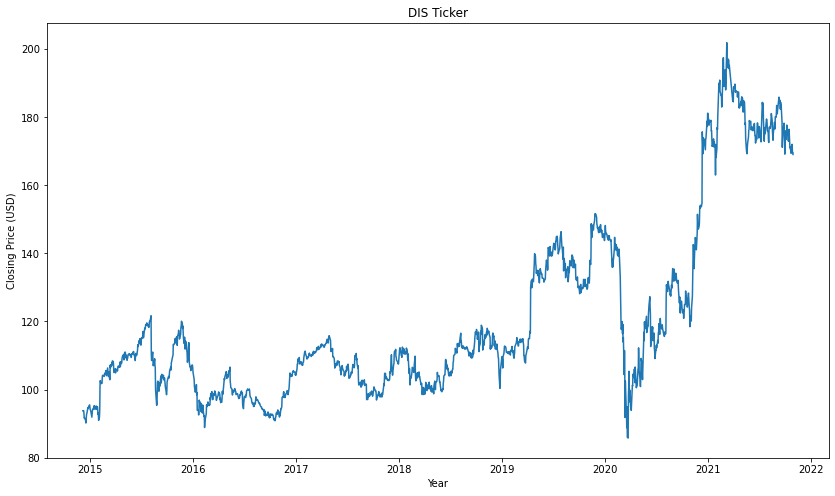

In [38]:
plt.figure(figsize=(14,8))

plt.plot(dis_yfinance['parsed_dates'], dis_yfinance['Close'])
plt.title("DIS Ticker")
plt.xlabel("Year")
plt.ylabel("Closing Price (USD)")

## Plots of subreddit submission metrics

In [ ]:
cleaned_dfs = [weekday_df, land_df, plus_df, pixar_df]

In [ ]:
score_plots = []

for _ in cleaned_dfs:
    score_plots.append()

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


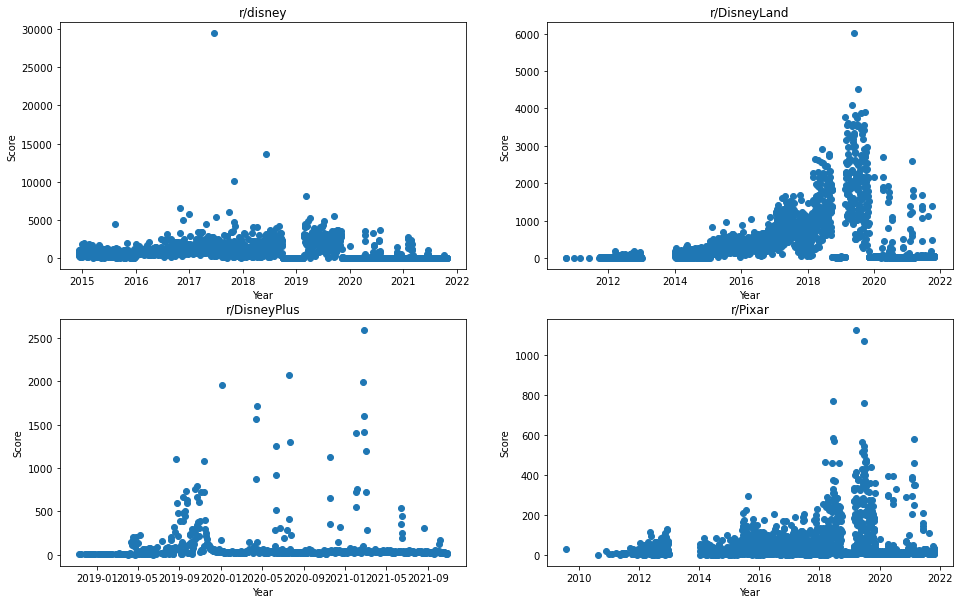

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

print(axes)

# plt.figure(figsize=(16,8))

score_plots = [("r/disney", weekday_df['parsed_dates'], weekday_df['score']), 
               ("r/DisneyLand", land_df['parsed_dates'], land_df['score']),
               ("r/DisneyPlus", plus_df['parsed_dates'], plus_df['score']),
               ("r/Pixar", pixar_df['parsed_dates'], pixar_df['score'])
              ]


for i, ax in enumerate(fig.axes):
    (label, X, y) = score_plots[i]
    ax = plt.subplot(2, 2, i+1)
    ax.scatter(X, y)
    ax.set_title(label)
    ax.set_xlabel("Year")
    ax.set_ylabel("Score")


Text(0, 0.5, 'Score')

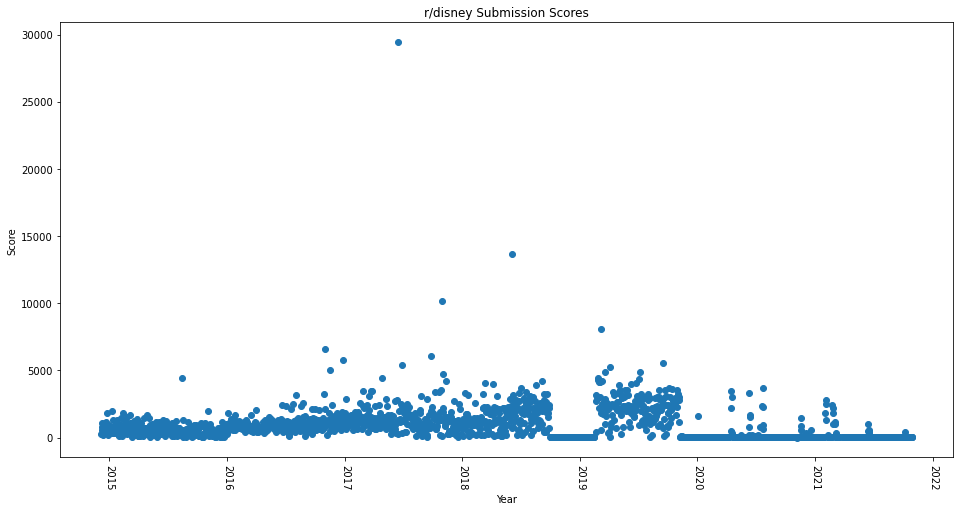

In [39]:
plt.figure(figsize=(16,8))

plt.scatter(weekday_df['parsed_dates'], weekday_df['score'])
plt.xticks(rotation=270)
plt.title("r/disney Submission Scores")
plt.xlabel("Year")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

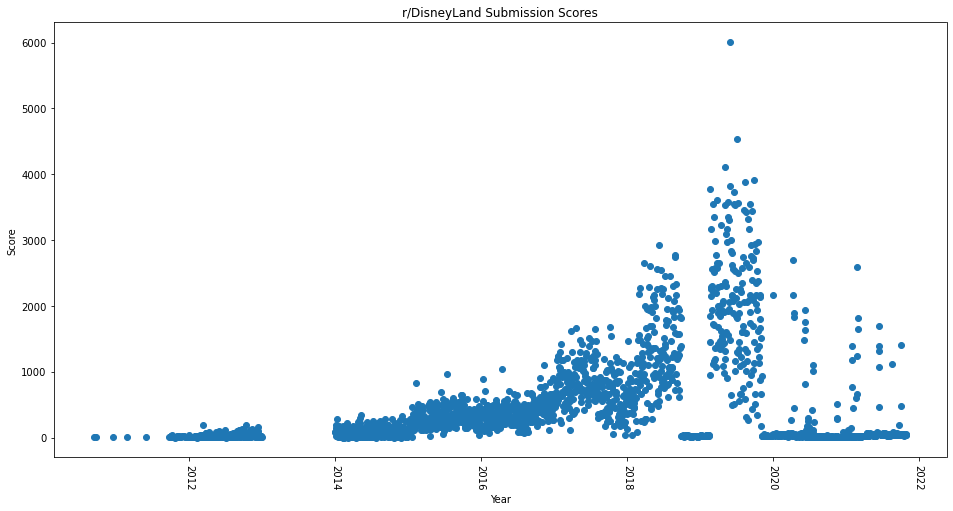

In [40]:
plt.figure(figsize=(16,8))

plt.scatter(land_df['parsed_dates'], land_df['score'])
plt.xticks(rotation=270)
plt.title("r/DisneyLand Submission Scores")
plt.xlabel("Year")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

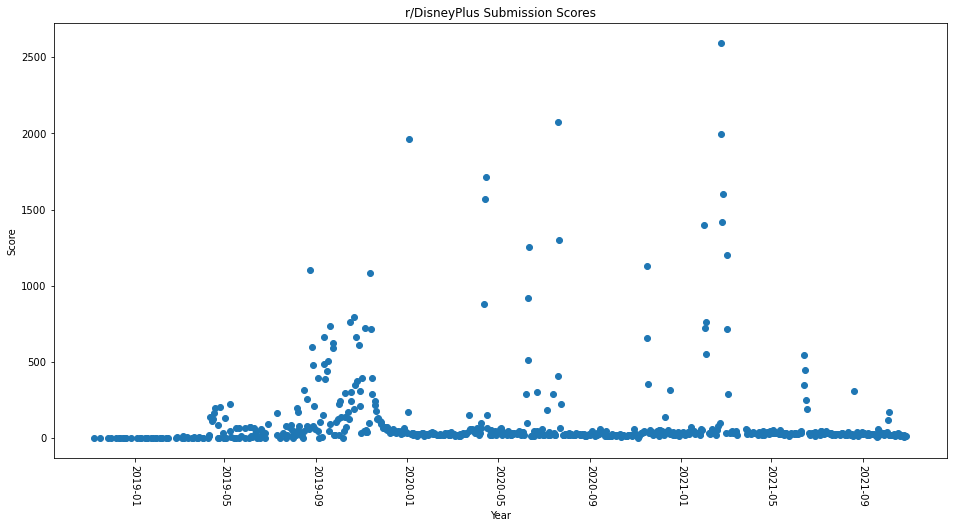

In [41]:
plt.figure(figsize=(16,8))

plt.scatter(plus_df['parsed_dates'], plus_df['score'])
plt.xticks(rotation=270)
plt.title("r/DisneyPlus Submission Scores")
plt.xlabel("Year")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

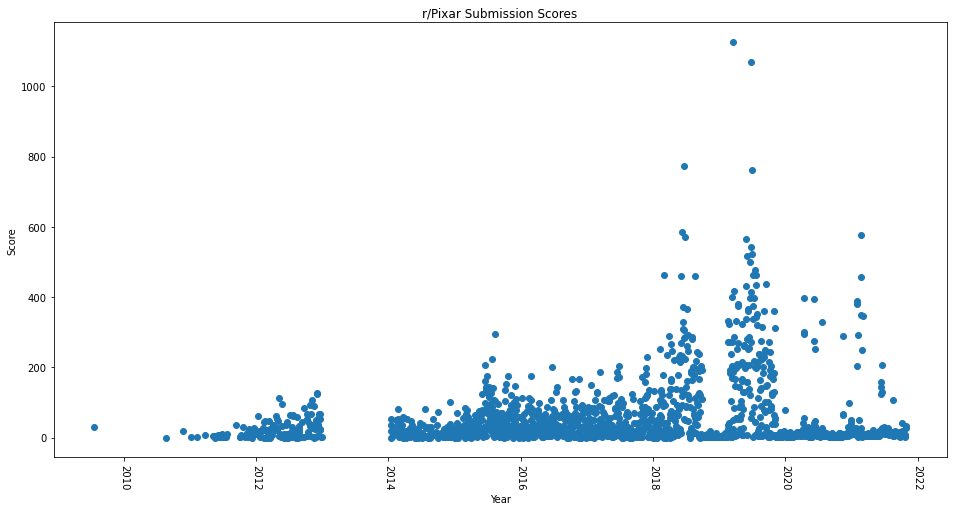

In [42]:
plt.figure(figsize=(16,8))

plt.scatter(pixar_df['parsed_dates'], pixar_df['score'])
plt.xticks(rotation=270)
plt.title("r/Pixar Submission Scores")
plt.xlabel("Year")
plt.ylabel("Score")

Text(0, 0.5, '# of Comments')

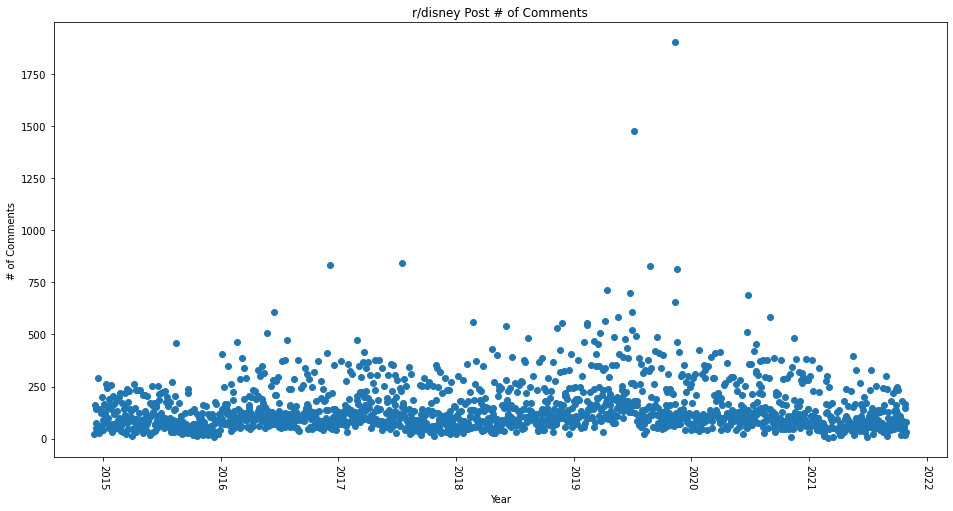

In [43]:
plt.figure(figsize=(16,8))

plt.scatter(weekday_df['parsed_dates'], weekday_df['num_comments'])
plt.xticks(rotation=270)
plt.title("r/disney Post # of Comments")
plt.xlabel("Year")
plt.ylabel("# of Comments")

Text(0, 0.5, '# of Comments')

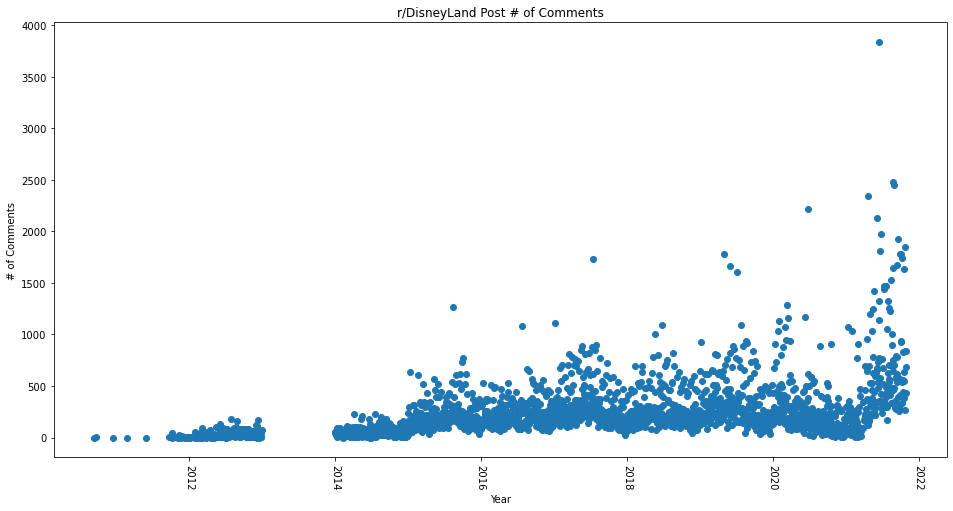

In [44]:
plt.figure(figsize=(16,8))

plt.scatter(land_df['parsed_dates'], land_df['num_comments'])
plt.xticks(rotation=270)
plt.title("r/DisneyLand Post # of Comments")
plt.xlabel("Year")
plt.ylabel("# of Comments")

Text(0, 0.5, '# of Comments')

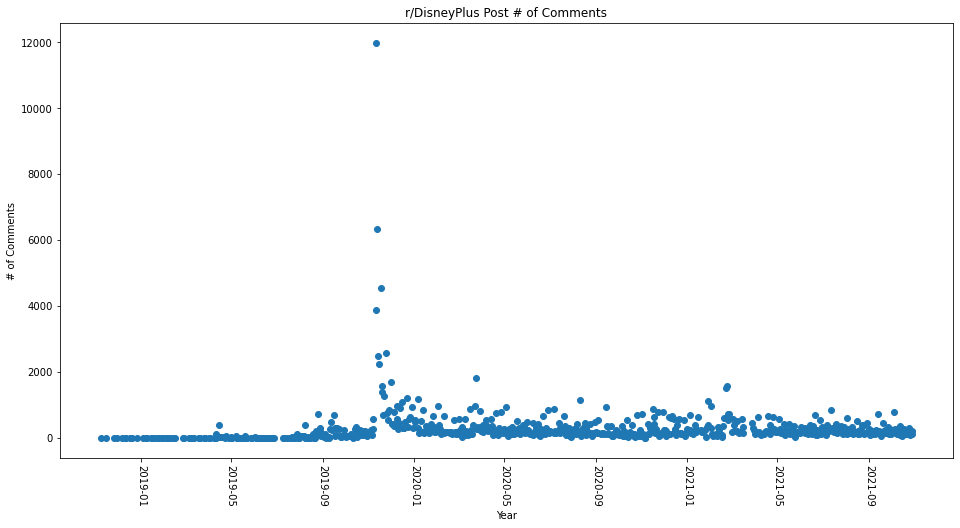

In [45]:
plt.figure(figsize=(16,8))

plt.scatter(plus_df['parsed_dates'], plus_df['num_comments'])
plt.xticks(rotation=270)
plt.title("r/DisneyPlus Post # of Comments")
plt.xlabel("Year")
plt.ylabel("# of Comments")

Text(0, 0.5, '# of Comments')

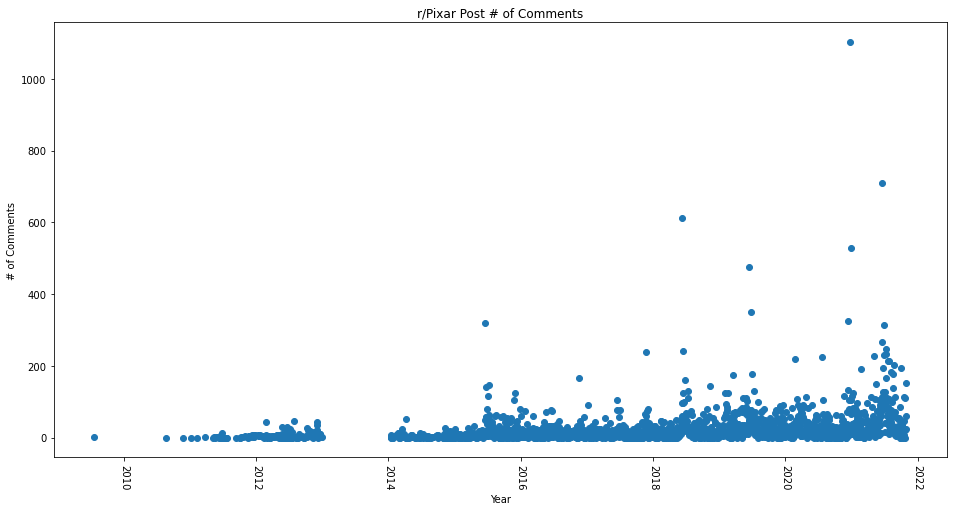

In [46]:
plt.figure(figsize=(16,8))

plt.scatter(pixar_df['parsed_dates'], pixar_df['num_comments'])
plt.xticks(rotation=270)
plt.title("r/Pixar Post # of Comments")
plt.xlabel("Year")
plt.ylabel("# of Comments")

## Linear Regressions of stock prices as a function of subreddit submission metrics

In [47]:
X_score = weekday_df['score']
X_coms = weekday_df['num_comments']
y = dis_yfinance['Close']

In [52]:
linreg_score = linregress(weekday_df['score'], dis_yfinance['Close'])

linreg_coms = linregress(weekday_df['num_comments'], dis_yfinance['Close'])

In [53]:
print("Linear regression of stock prices as function of subreddit post scores")
print(f"The slope is: {linreg_score.slope}")
print(f"The Interecept is: {linreg_score.intercept}")
print(f"The p.value is: {linreg_score.pvalue}\n")

print("Linear regression of stock prices as function of number of comments on subreddit posts")
print(f"The slope is: {linreg_coms.slope}")
print(f"The Interecept is: {linreg_coms.intercept}")
print(f"The p.value is: {linreg_coms.pvalue}")

Linear regression of stock prices as function of subreddit post scores
The slope is: -0.004172330712605523
The Interecept is: 124.25571347906586
The p.value is: 8.777905974278548e-18

Linear regression of stock prices as function of number of comments on subreddit posts
The slope is: -0.001574212292856976
The Interecept is: 120.54029833002436
The p.value is: 0.7595610808895554


Text(0, 0.5, 'Stock Prices ($)')

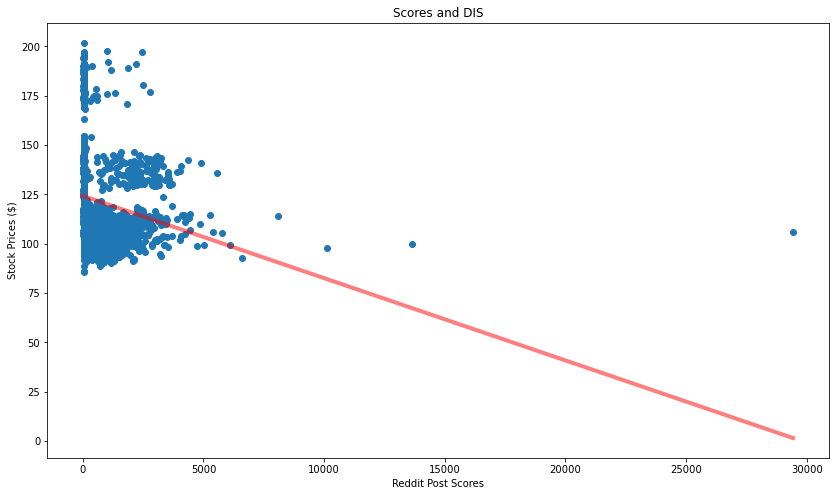

In [50]:
plt.figure(figsize=(14,8))

x_axis = np.arange(max(X_score))
y_line = linreg_score.intercept + linreg_score.slope * x_axis

plt.scatter(X_score, y)

plt.plot(x_axis, y_line, color='red', linewidth=4, alpha=0.5)
plt.title("Scores and DIS")
plt.xlabel("Reddit Post Scores")
plt.ylabel("Stock Prices ($)")

Text(0, 0.5, 'Stock Prices ($)')

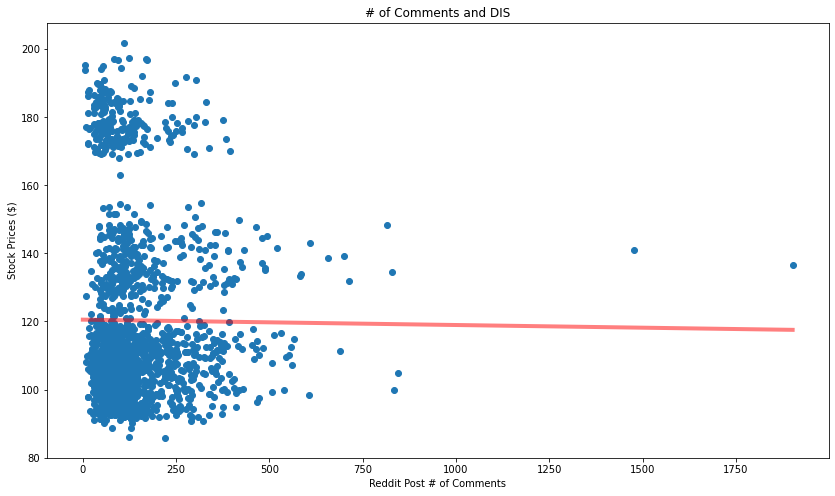

In [51]:
plt.figure(figsize=(14,8))

x_axis = np.arange(max(X_coms))
y_line = linreg_coms.intercept + linreg_coms.slope * x_axis

plt.scatter(X_coms, y)

plt.plot(x_axis, y_line, color='red', linewidth=4, alpha=0.5)
plt.title("# of Comments and DIS")
plt.xlabel("Reddit Post # of Comments")
plt.ylabel("Stock Prices ($)")